In [1]:
import numpy as np
import matplotlib.pyplot as plt

Encoder-length[cm] conversion factors

In [2]:
trolley_to_radius = 22.7 / 30000.0
rotate_to_phi = np.pi / 8000.0
vertical_to_z = 15.2 / 50000.0

Define column numbers

In [3]:
idx_trolley = 0
idx_rotate = 1
idx_vertical = 2
idx_bfx = 3
idx_bfx_std = 4
idx_bfy = 5
idx_bfy_std = 6
idx_bfz = 7
idx_bfz_std = 8
idx_b0_status = 9
idx_monitor = 10
idx_monitor_std = 11
idx_time = 12

i = 25 mA + 10, 5, 2, 

Load the raw data

In [4]:
# Modify only here
data_name = '04-10-2022_20-25'


data_path = 'data/' + data_name
data = np.loadtxt(data_path + '/output.txt')

Split the B0 on and off data and create a difference data

In [5]:
data_on = data[::2]
data_off = data[1::2]

data_diff = data_on
data_diff[:, idx_bfx] = data_on[:, idx_bfx] - data_off[:, idx_bfx]
data_diff[:, idx_bfy] = data_on[:, idx_bfy] - data_off[:, idx_bfy]
data_diff[:, idx_bfz] = data_on[:, idx_bfz] - data_off[:, idx_bfz]
data_diff[:, idx_monitor] = data_on[:, idx_monitor] - data_off[:, idx_monitor]

Take a look at time vs monitor data

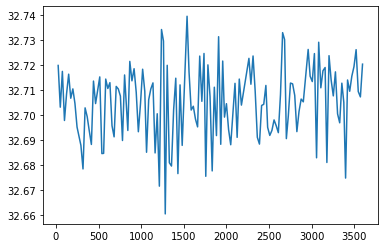

In [6]:
plt.plot(data_diff[:, idx_time], data_diff[:, idx_monitor])

Print trolley rotate and vertical to identify where to split data

In [7]:
print(data_diff[:, 0:3])

[[  4525.   4160. -70000.]
 [  4525.   4160. -66500.]
 [  4525.   4160. -63000.]
 [  4525.   4160. -59500.]
 [  4525.   4160. -56000.]
 [  4525.   4160. -52500.]
 [  4525.   4160. -49000.]
 [  4525.   4160. -45500.]
 [  4525.   4160. -42000.]
 [  4525.   4160. -38500.]
 [  4525.   4160. -35000.]
 [  4525.   4160. -35000.]
 [  4525.   4160. -38500.]
 [  4525.   4160. -42000.]
 [  4525.   4160. -45500.]
 [  4525.   4160. -49000.]
 [  4525.   4160. -52500.]
 [  4525.   4160. -56000.]
 [  4525.   4160. -59500.]
 [  4525.   4160. -63000.]
 [  4525.   4160. -66500.]
 [  4525.   4160. -70000.]
 [  4525.   4160. -70000.]
 [  4525.   4160. -66500.]
 [  4525.   4160. -63000.]
 [  4525.   4160. -59500.]
 [  4525.   4160. -56000.]
 [  4525.   4160. -52500.]
 [  4525.   4160. -49000.]
 [  4525.   4160. -45500.]
 [  4525.   4160. -42000.]
 [  4525.   4160. -38500.]
 [  4525.   4160. -35000.]
 [  2525.   4160. -52032.]
 [  4525.   4160. -52032.]
 [  8525.   4160. -52032.]
 [ 12525.   4160. -52032.]
 

In [8]:
data_z_scan = data_diff[:33]

In [9]:
data_horizontal = data_diff[33:]

data_xp_scan, data_yp_scan, data_xm_scan, data_ym_scan = np.split(data_horizontal, 4)

In [10]:
def fit_plot(x, y, deg=2):
    p_coef = np.polyfit(x, y, deg)
    p = np.poly1d(p_coef)

    print(p_coef)

    print(-0.5 * p_coef[1]/p_coef[0])
    plt.plot(x, y, '.')
    plt.plot(x, p(x))


[-4.82285043e-11 -5.99276829e-06  3.37993222e+01]
-62128.90467867214


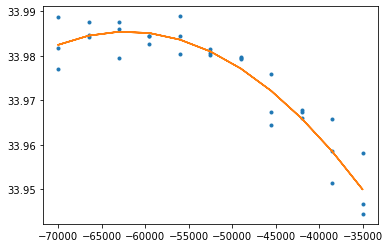

In [11]:
z_scan_z = data_z_scan[:, idx_vertical]
bmag_z_scan = np.sqrt(data_z_scan[:, idx_bfx]**2 + data_z_scan[:, idx_bfy]**2 + data_z_scan[:, idx_bfz]**2)

fit_plot(z_scan_z, bmag_z_scan)

[ 2.72916449e-10 -2.75090856e-06  3.39904445e+01]
5039.836497185279


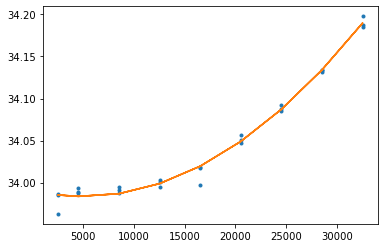

In [15]:
xp_scan_x = data_xp_scan[:, idx_trolley]
bmag_xp_scan = np.sqrt(data_xp_scan[:, idx_bfx]**2 + data_xp_scan[:, idx_bfy]**2 + data_xp_scan[:, idx_bfz]**2)

fit_plot(xp_scan_x, bmag_xp_scan)

[2.88721928e-10 5.10545848e-06 3.40175172e+01]
-8841.48030169614


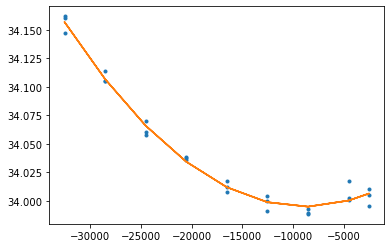

In [16]:
xm_scan_x = -data_xm_scan[:, idx_trolley]
bmag_xm_scan = np.sqrt(data_xm_scan[:, idx_bfx]**2 + data_xm_scan[:, idx_bfy]**2 + data_xm_scan[:, idx_bfz]**2)

fit_plot(xm_scan_x, bmag_xm_scan)

[ 1.70099607e-10 -4.62037174e-06  3.40060837e+01]
13581.371038427109


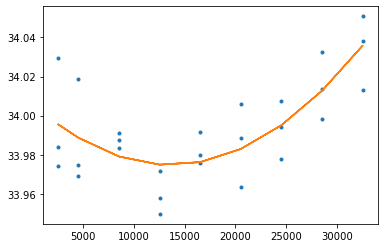

In [17]:
yp_scan_y = data_yp_scan[:, idx_trolley]
bmag_yp_scan = np.sqrt(data_yp_scan[:, idx_bfx]**2 + data_yp_scan[:, idx_bfy]**2 + data_yp_scan[:, idx_bfz]**2)

fit_plot(yp_scan_y, bmag_yp_scan)

[1.54894341e-10 3.58458493e-06 3.39822512e+01]
-11571.064846857264


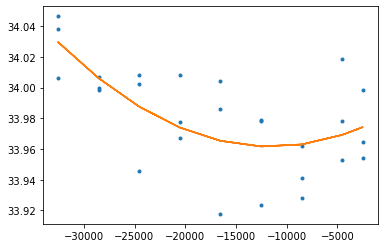

In [19]:
ym_scan_y = -data_ym_scan[:, idx_trolley]
bmag_ym_scan = np.sqrt(data_ym_scan[:, idx_bfx]**2 + data_ym_scan[:, idx_bfy]**2 + data_ym_scan[:, idx_bfz]**2)

fit_plot(ym_scan_y, bmag_ym_scan)